# Automatic Facial Landmarks Annotation

Facial landmarks are an additional information that spatially and geometrically represents the most important features in a face, such as the position of the eyes, nose and mouth as well as the shape of the face.

When we talk about image processing, this information is quite helpful to align an image, since the coordinates for these features let us measure tha angle and distance of each eye, for example.

Obviously, we expect the angle between the eyes to be flat, otherwise, the image needs to be rotated. Moreover, it is desirable that we normalize each face to make them have approximately the same size, therefore we change the scale of the image so the distance between the eyes are the same for all images.

Besides face alignment, landmarks are also useful to create metrics that later on can be used for facial recognition.

However, detecting facial landmarks is a challenging task to do automatically and it is common to find works that did this semi-automatically if not manually. 

For this reason, a lot of research have been conducted to create machine learning model that reliably predicts the landmarks locations in a face. Fortunately, with the more recent advancements in machine learning, these models are [now available](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/), and are quite reliable.

<img src=https://ibug.doc.ic.ac.uk/media/uploads/images/annotpics/figure_68_markup.jpg alt="68landmarks" style="width: 400px;"/>

Using the powerful machine learning library `dlib`, this tutorial shows how to automatically annotate facial landmarks using Python.

## Import libraries

In [1]:
import numpy as np #as always
import dlib #machine learning library
import matplotlib.pyplot as plt #to visualize things
from PIL import Image #to manipulate images

from urllib.request import urlretrieve #to download our dataset
from io import BytesIO        # these libraries are used to unzip 
from zipfile import ZipFile   # and store images in memory
import bz2                    # including .bz2 file extensions

from pylab import rcParams #just so I can resize my resulting images
rcParams['figure.figsize'] = 20, 15

## Download the dataset
This next chunk of code will download the [face images dataset](http://fei.edu.br/~cet/facedatabase.html) we're going to use for this tutorial.

Then, it will convert these images to `numpy` array, so `dlib` can understand it, and append each one of them to a list.

Finally, in the last line, this list is converted into a larger `numpy` array containing all images.

In [2]:
url_list = [
    'http://fei.edu.br/~cet/frontalimages_spatiallynormalized_part1.zip',
    'http://fei.edu.br/~cet/frontalimages_spatiallynormalized_part2.zip',
]

archive = [ZipFile(urlretrieve(url)[0], 'r') for url in url_list]
images = [image for zipfile in archive for image in zipfile.namelist()]

face_db = []
for image in images:
    try:
        face = Image.open(BytesIO(archive[0].read(image)))
    except:
        face = Image.open(BytesIO(archive[1].read(image)))
        
    face_db.append(np.array(face))

face_db = np.array(face_db)

## Download and extract landmarks predictor

Next, we need to download the trained model which is able to predict the location of each of the 68 landmarks in a face image.

Since I don't want this tutorial to have any additional step other than the code available here, the following script will automatically download the file and store it in your temporary files.

In [3]:
url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
filepath  = urlretrieve(url)[0]
data = bz2.BZ2File(filepath).read()
with open(filepath, 'wb') as f:
    f.write(data)

print(filepath)

/tmp/tmpky2qbl5w


##  Create the landmarks dataset

With the trained model in hands ~~(hope it didn't take long to download)~~, we can build our landmarks dataset for each face image accordingly.

First, we need to define the face detector using `dlib.get_frontal_face_detector()`, and then, we specify the landmarks predictor using `dlib.shape_predictor(`*path_to_trained_model_file*`)`.

Next, for each face in our face dataset, we need to first **detect** it and then **predict** the coordinates for the 68 landmarks.

Note that the landmarks coordinates are not a `numpy` array, so we also need to convert it to array and finally append to our landmarks dataset.

In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(filepath)

landmarks_db = []
for face in face_db:
    rect = detector(face)[0]
    shape = predictor(face, rect)
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])
    landmarks_db.append(landmarks)

landmarks_db = np.array(landmarks_db)

## Results

So lets recap. We have a dataset containing face images and another dataset contained 68 landmarks coordinates for each face.

This last chunk of code shows how to plot a sample of 15 faces with landmarks annotated.

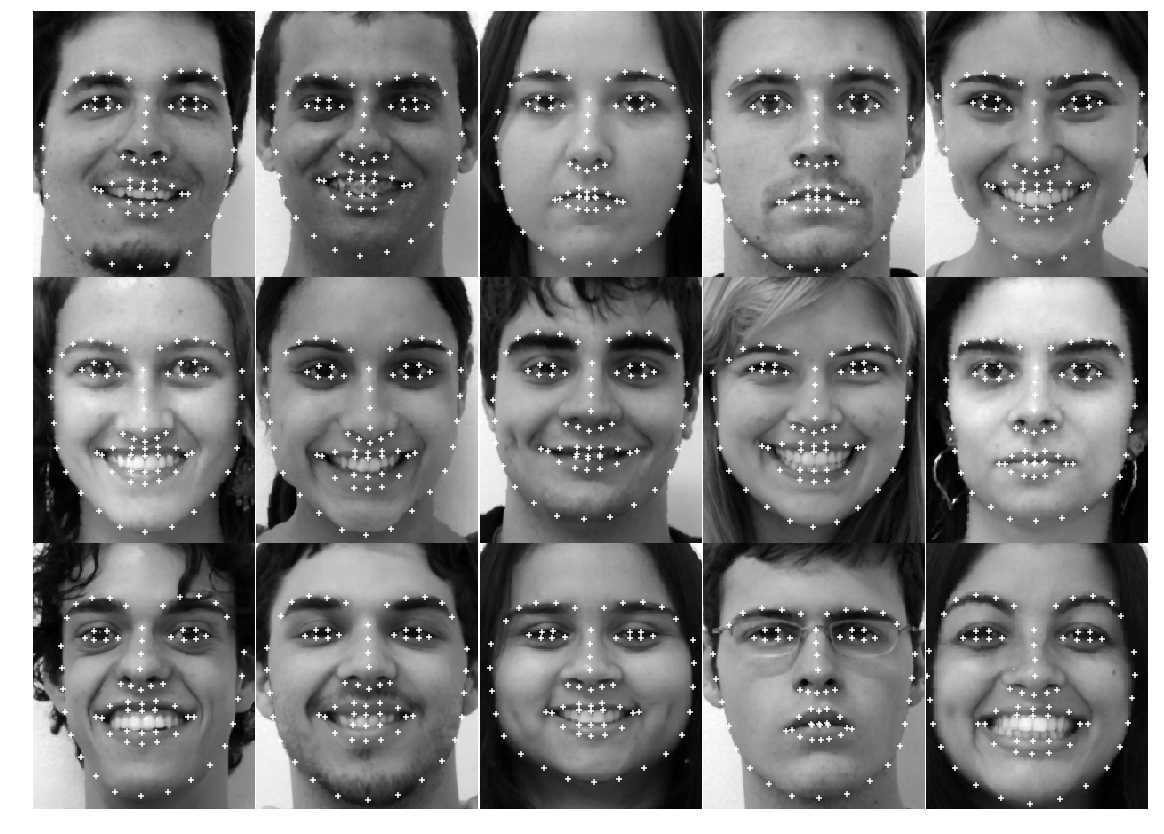

In [5]:
def plot_landmarks(image,vtk):
    plt.imshow(image,cmap='gray',origin="lower")
    plt.scatter(vtk[:,0],vtk[:,1],marker='+',color='w')
    plt.xlim([0,image.shape[1]])
    plt.ylim([0,image.shape[0]])
    plt.gca().invert_yaxis()
    plt.axis('off')
    
np.random.seed(1)
fig = plt.figure(figsize=(20.,14.7))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(15):
    k = np.random.randint(0,face_db.shape[0])
    plt.subplot(3,5,i+1)
    plot_landmarks(face_db[k],landmarks_db[k])

## References

Davis E. King. [Dlib-ml: A Machine Learning Toolkit](http://jmlr.csail.mit.edu/papers/volume10/king09a/king09a.pdf). *Journal of Machine Learning Research 10*, pp. 1755-1758, 2009